In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
#sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install yfinance
import yfinance as yf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 15.1 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.
apache-beam 2.40.0 requires dill<0.3.2,>=0.3.1.1, but you

In [3]:
msft = yf.Ticker("^GSPC")

# get stock info
#msft.info

# get historical market data
hist = msft.history(period="5y")
hist.info()
hist.isna().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2018-01-29 00:00:00-05:00 to 2023-01-27 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1259 non-null   float64
 1   High          1259 non-null   float64
 2   Low           1259 non-null   float64
 3   Close         1259 non-null   float64
 4   Volume        1259 non-null   int64  
 5   Dividends     1259 non-null   float64
 6   Stock Splits  1259 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 111.0 KB


Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

7

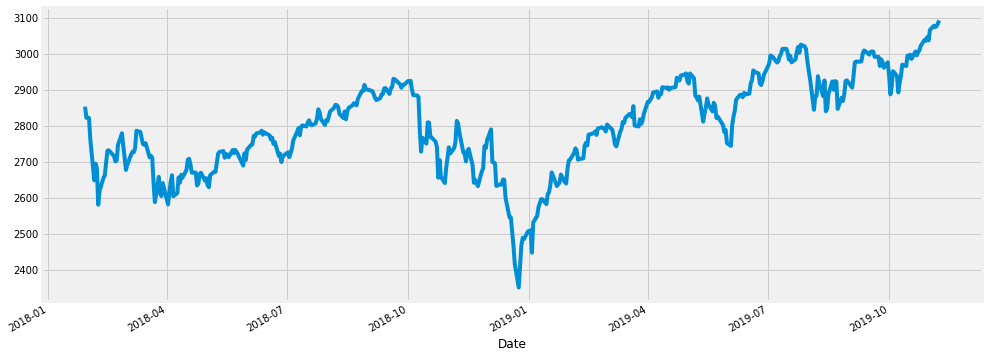

In [4]:
plt.rcParams["figure.figsize"] = [15,6]
hist['Close'][0:450].plot()
hist.shape[1]

In [5]:
data_target = hist.filter(['Close'])


target = data_target.values
#target = target+
# Splitting the dataset into training and test
# Target Variable: Close stock price value
#np.append(target,[])
training_data_len = math.ceil(len(target)* 0.86) # training set has 75% of the data
#training_data_len

# Normalizing data before model fitting using MinMaxScaler
# Feature Scaling

sc = MinMaxScaler(feature_range=(0,1))
training_scaled_data = sc.fit_transform(target)
training_scaled_data
target[-3:]

array([[4016.2199707 ],
       [4060.42993164],
       [4088.01000977]])

In [6]:
data_target

,Close
Date,
2018-01-29 00:00:00-05:00,2853.530029
2018-01-30 00:00:00-05:00,2822.429932
2018-01-31 00:00:00-05:00,2823.810059
2018-02-01 00:00:00-05:00,2821.979980
2018-02-02 00:00:00-05:00,2762.129883
...,...
2023-01-23 00:00:00-05:00,4019.810059
2023-01-24 00:00:00-05:00,4016.949951
2023-01-25 00:00:00-05:00,4016.219971


In [7]:
train_data = training_scaled_data[0:training_data_len  , : ]

X_train = []
y_train = []
for i in range(180, len(train_data)):
    X_train.append(train_data[i-180:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train) # converting into numpy sequences to train the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('Number of rows and columns: ', X_train.shape)  #(854 values, 180 time-steps, 1 output)

Number of rows and columns:  (903, 180, 1)


In [8]:
model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

2023-01-27 20:39:23.018431: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 20:39:23.019766: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 20:39:23.114178: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 20:39:23.115359: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 20:39:23.116393: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/100


2023-01-27 20:39:33.280311: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


29/29 [==============================] - 8s 29ms/step - loss: 0.0476
Epoch 2/100
29/29 [==============================] - 1s 23ms/step - loss: 0.0091
Epoch 3/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0070
Epoch 4/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0063
Epoch 5/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0060
Epoch 6/100
29/29 [==============================] - 1s 23ms/step - loss: 0.0065
Epoch 7/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0054
Epoch 8/100
29/29 [==============================] - 1s 23ms/step - loss: 0.0054
Epoch 9/100
29/29 [==============================] - 1s 31ms/step - loss: 0.0054
Epoch 10/100
29/29 [==============================] - 1s 24ms/step - loss: 0.0051
Epoch 11/100
29/29 [==============================] - 1s 23ms/step - loss: 0.0050
Epoch 12/100
29/29 [==============================] - 1s 23ms/step - loss: 0.0053
Epoch 13/100
29/29 [=================

In [9]:
#training_scaled_data=training_scaled_data+[(3973.6143/5857.062)]
test_data = training_scaled_data[training_data_len - 180: , : ]

#Create the x_test and y_test data sets
X_test = []
y_test =  target[training_data_len : , : ]
for i in range(180,len(test_data)):
    X_test.append(test_data[i-180:i,0])

# Convert x_test to a numpy array
X_test = np.array(X_test)

#Reshape the data into the shape accepted by the LSTM
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print('Number of rows and columns: ', X_test.shape)

Number of rows and columns:  (176, 180, 1)


In [72]:
training_scaled_data[-10:]

array([[0.68216521],
       [0.68838606],
       [0.6852131 ],
       [0.66094347],
       [0.64921697],
       [0.67803893],
       [0.69648246],
       [0.69536486],
       [0.69507962],
       [0.70366837]])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


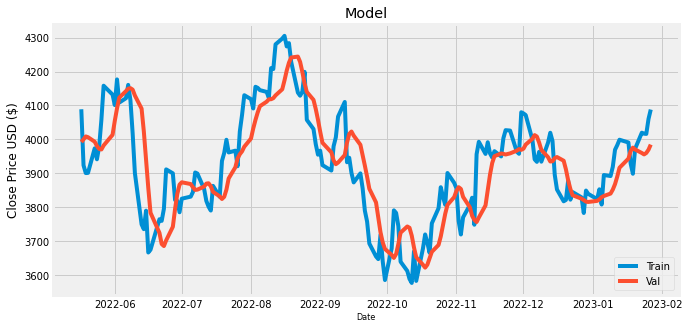

In [10]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
train = data_target[:training_data_len]
valid = data_target[training_data_len:]
valid['Predictions'] = predicted_stock_price
plt.figure(figsize=(10,5))
plt.title('Model')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
#plt.plot(train['Close'][-400:])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [17]:
#u1=model.predict(X_test)
#X_test.shape
predicted_stock_price[-3:]
model.save('huh.h5')